<a href="https://colab.research.google.com/github/GAI-COP/Text-Mining/blob/main/TextMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installs for Textract

In [1]:
!pip install --upgrade pip

In [2]:
!pip install "setuptools<58.0.0"

In [3]:
!pip install textract

It will ask to restart session. Click okay then rerun textract install.

In [4]:
!pip install pdfminer.six

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Scraping a PDF

In [6]:
import textract

In [7]:
pdf_text = textract.process("/content/drive/MyDrive/annotated-literature-review.pdf", method='pdfminer',
    language='eng')
pdf_text = pdf_text.decode("utf-8")

## Preprocessing Pipeline

In [8]:
import re

In [10]:
def clean_text(text):
    text = re.sub('\xa0', ' ', text)
    text = re.sub('\n•', ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\ue080', ' ', text)
    text = re.sub('\x0c', ' ', text)
    html = re.compile('[<,#*?>]')
    text = html.sub(r' ',text)
    url = re.compile('https?://\S+|www\.S+')
    text = url.sub(r' ',text)
    email = re.compile('[A-Za-z0-2]+@[\w]+.[\w]+')
    text = email.sub(r' ',text)
    return text

In [11]:
pdf_text = clean_text(pdf_text)

## Processing Pipeline for Word Tokenization

In [12]:
!pip install svgling

In [13]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
import svgling
import string

In [21]:
nltk.download('stopwords')
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger")
nltk.download("maxent_ne_chunker")
nltk.download("words")
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /roo

True

In [15]:
def token_creator(clean_text):

    tokens = word_tokenize(clean_text)

    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    stemmer = SnowballStemmer('english')
    lemmatizer = WordNetLemmatizer()

    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    cleaned_tokens = [token for token in lemmatized_tokens
                  if not token.isdigit() and not token in string.punctuation]

    lowercase_tokens = [token.lower() for token in cleaned_tokens]

    pos_tags = pos_tag(lowercase_tokens)

    named_entities = ne_chunk(pos_tags)

    return named_entities, pos_tags, lowercase_tokens, stemmed_tokens

In [22]:
pdf_text_named_entities, pdf_text_pos_tags, pdf_text_lowercase_tokens, pdf_text_stemmed_tokens = token_creator(pdf_text)

## Sentence Tokenization

In [23]:
from nltk.tokenize import sent_tokenize


In [24]:
def token_sent_creator(clean_text):

    sentences = sent_tokenize(clean_text)
    sentences = [sent.lower().replace(".", "") for sent in sentences]
    return sentences

In [25]:
pdf_text_sentence = token_sent_creator(pdf_text)

## Word Count

In [26]:
import pandas as pd
from nltk.probability import FreqDist

In [27]:
wc = FreqDist(pdf_text_lowercase_tokens)

In [28]:
wc

FreqDist({'language': 87, 'english': 56, 'learner': 49, 'literature': 34, 'review': 32, 'impairment': 31, 'assessment': 25, 'research': 23, '’': 18, 'paragraph': 17, ...})

In [29]:
df_wc = pd.DataFrame(wc.items(), columns=["word", "freq"])

In [30]:
df_wc.sort_values(by=["freq"], ascending=False)

,word,freq
85,language,87
80,english,56
82,learner,49
1,literature,34
2,review,32
...,...,...
405,violates,1
404,normally,1
403,label,1
402,occurs,1


In [48]:
def token_with_stop(clean_text):

    tokens = word_tokenize(clean_text)

    stop_words = ["language", "english", "learner", "literature", "review"] + list(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    cleaned_tokens = [token for token in lemmatized_tokens
                  if not token.isdigit() and not token in string.punctuation]

    lowercase_tokens = [token.lower() for token in cleaned_tokens]

    return lowercase_tokens

In [49]:
pdf_text_lowercase_tokens = token_with_stop(pdf_text)

In [50]:
wc = FreqDist(pdf_text_lowercase_tokens)

In [51]:
df_wc = pd.DataFrame(wc.items(), columns=["word", "freq"])

In [52]:
top_wc = df_wc[df_wc.freq > 20].sort_values(by=["freq"], ascending=False)
top_wc

,word,freq
80,learner,48
256,impairment,31
100,assessment,25
142,research,23


In [36]:
import matplotlib.pyplot as plt

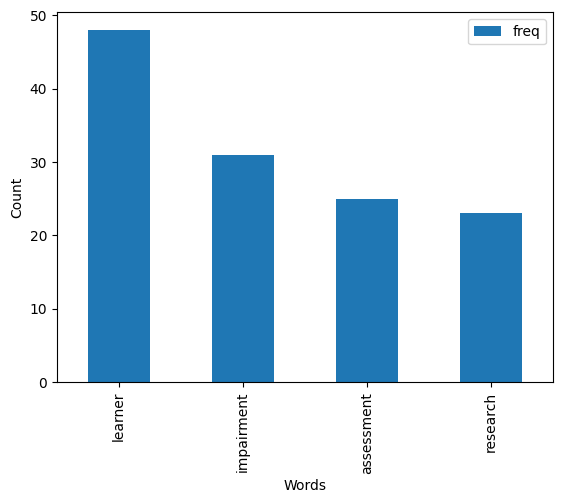

In [53]:
top_wc.plot(x="word", kind='bar')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

## Word Cloud

In [38]:
!pip install wordcloud

In [39]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

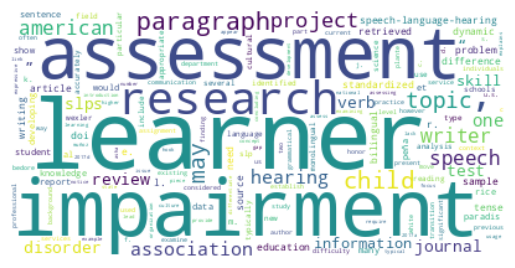

In [54]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(dict(wc))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [55]:
pdf_text_lowercase_tokens = token_with_stop(pdf_text)

## Count Vectorizer

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [56]:
corpus_pdf_text = [pdf_text]

In [57]:
count_vect = CountVectorizer(stop_words='english')
BOW = count_vect.fit_transform(corpus_pdf_text)
count_vect.vocabulary_

{'sample': 678,
 'literature': 476,
 'review': 660,
 'following': 362,
 'composed': 228,
 'honors': 398,
 'capstone': 183,
 'project': 606,
 'proposal': 607,
 'field': 355,
 'communication': 218,
 'sciences': 690,
 'disorders': 300,
 'served': 703,
 'introduction': 436,
 'larger': 457,
 'work': 837,
 'opposed': 540,
 'stand': 743,
 'piece': 576,
 'assignment': 151,
 'create': 248,
 'justification': 444,
 'design': 274,
 'examining': 331,
 'state': 746,
 'knowledge': 449,
 'topic': 790,
 'key': 445,
 'concepts': 231,
 'theories': 783,
 'serve': 702,
 'foundation': 365,
 'gaps': 373,
 'needs': 519,
 'address': 119,
 'double': 306,
 'spaced': 734,
 'pages': 550,
 'slightly': 725,
 'longer': 478,
 'typical': 800,
 'journal': 442,
 'article': 144,
 'comprehensive': 229,
 'meaning': 493,
 'draws': 307,
 'sources': 732,
 'class': 204,
 'assignments': 152,
 'reviews': 663,
 'thesis': 785,
 'dissertation': 301,
 'require': 647,
 'students': 757,
 'carefully': 185,
 'examine': 330,
 'limited': 4

In [58]:
sum_words = BOW.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vect.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [59]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

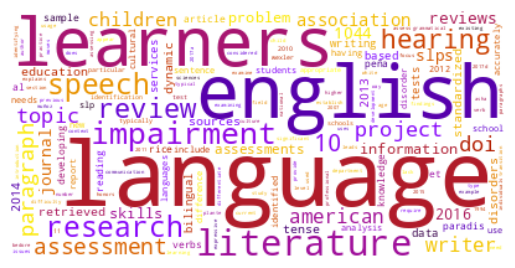

In [60]:
wordcloud = WordCloud(background_color="white", colormap = "gnuplot")
wordcloud.generate_from_frequencies(dict(words_freq))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [66]:
new_stopwords = ["learners", "english", "language", "10", "2014", "2016", "2012", "2013", "doi","1044"]

In [67]:
words_freq_df = pd.DataFrame(words_freq, columns=["word", "freq"])

In [68]:
words_freq_df = words_freq_df[~words_freq_df['word'].isin(new_stopwords)]

In [69]:
words_freq_dict = words_freq_df.set_index('word').to_dict()['freq']

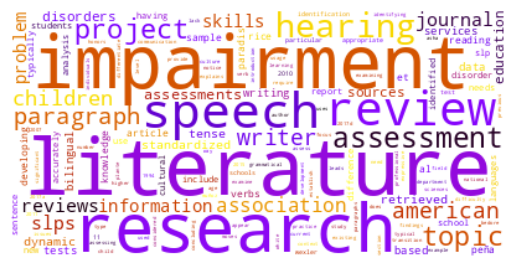

In [70]:
wordcloud = WordCloud(background_color="white", colormap = "gnuplot")
wordcloud.generate_from_frequencies(words_freq_dict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Ngrams

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [72]:
corpus_pdf_text = [pdf_text]

In [73]:
top_wf_comb = []

In [74]:
def frequency_table(ngram_min, ngram_max, corpus):
   for i in range (ngram_min, ngram_max):
        count_vect = CountVectorizer(ngram_range=(i, i), stop_words='english', max_features=100)
        BOW = count_vect.fit_transform(corpus)
        sum_words = BOW.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in count_vect.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        words_freq_df = pd.DataFrame(words_freq, columns=["word", "freq"])
        top_wf = words_freq_df[words_freq_df.freq > 10].sort_values(by=["freq"], ascending=False)
        top_wf_comb.append(top_wf)
   return top_wf_comb

In [75]:
top_wf_comb = frequency_table(1, 3, corpus_pdf_text)

In [76]:
top_wf_comb

[           word  freq
 0      language    96
 1       english    59
 2      learners    50
 3    literature    34
 4    impairment    30
 5      research    25
 6        speech    25
 7        review    23
 8       hearing    21
 9            10    17
 10   assessment    16
 11      project    14
 12        topic    14
 13    paragraph    14
 14          doi    14
 15     american    13
 16       writer    13
 17     children    12
 18  association    12,
                   word  freq
 0     english learners    44
 1  language impairment    29
 2    literature review    19
 3      speech language    19
 4     language hearing    15
 5               doi 10    14
 6    learners language    13
 7      american speech    12
 8  hearing association    12]

In [77]:
new_unigrams = [b for b in top_wf_comb[0]["word"] if all(b not in t for t in top_wf_comb[1]["word"])]

In [78]:
top_wf_comb[0] = top_wf_comb[0][top_wf_comb[0]['word'].isin(new_unigrams)]

In [79]:
topwf = pd.concat(top_wf_comb)

In [80]:
topwf[topwf.freq > 10].sort_values(by=["freq"], ascending=False)

,word,freq
0,english learners,44
1,language impairment,29
5,research,25
2,literature review,19
3,speech language,19
10,assessment,16
4,language hearing,15
11,project,14
12,topic,14
13,paragraph,14


In [81]:
new_stopwords = ["doi 10"]

In [82]:
words_freq_df = topwf[~topwf['word'].isin(new_stopwords)]

In [83]:
words_freq_dict = words_freq_df.set_index('word').to_dict()['freq']

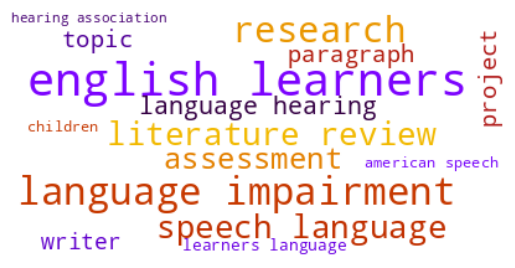

In [84]:
wordcloud = WordCloud(background_color="white", colormap = "gnuplot")
wordcloud.generate_from_frequencies(words_freq_dict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


## Zipf's Law

In [85]:
pdf_text

'        1   About this sample literature review: The following literature review was  composed as part of an honors capstone project proposal in the field of  communication sciences and disorders. It served as the introduction to the project  proposal and  thus  was part of a larger work (as opposed to a stand-alone piece).    The assignment was: In this literature review  you will create a justification for  your honors capstone project (and its design) by examining the state of  knowledge on your topic  the key concepts and theories that will serve as the  foundation for your project  and the gaps or needs that your project will address.  The literature review should be 4 to 5 double-spaced pages—slightly longer than  the literature review in a typical journal article.     This sample literature review is more comprehensive (meaning it draws on more  sources) than many class assignments but less comprehensive than literature  reviews for a thesis or dissertation. Class assignments t

In [86]:
def remove_numbers(text):
  text = re.sub("\d.", "", text)
  text = re.sub("[:\/,]", "", text )
  return text

In [87]:
pdf_text = remove_numbers(pdf_text)

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

In [89]:
corpus_pdf_text = [pdf_text]

In [90]:
top_wf_comb = []

In [94]:
def frequency_table(ngram_min, ngram_max, corpus):
   for i in range (ngram_min, ngram_max+1):
        count_vect = CountVectorizer(ngram_range=(i, i), stop_words='english', max_features=100)
        BOW = count_vect.fit_transform(corpus)
        sum_words = BOW.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in count_vect.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        words_freq_df = pd.DataFrame(words_freq, columns=["word", "freq"])
        top_wf = words_freq_df[words_freq_df.freq > 10].sort_values(by=["freq"], ascending=False)
        top_wf_comb.append(top_wf)
   return top_wf_comb

In [95]:
top_wf_comb = frequency_table(1, 3, corpus_pdf_text)

In [96]:
top_wf_comb[2]

,word,freq
0,language,96
1,english,59
2,learners,50
3,literature,34
4,impairment,30
5,speech,25
6,research,24
7,review,23
8,hearing,21
9,assessment,16


In [97]:
new_bigrams = [b for b in top_wf_comb[1]["word"] if all(b not in t for t in top_wf_comb[2]["word"])]
top_wf_comb[1] = top_wf_comb[1][top_wf_comb[1]["word"].isin(new_bigrams)]

In [98]:
new_unigrams = [b for b in top_wf_comb[0]["word"] if all(b not in t for t in top_wf_comb[1]["word"])]
top_wf_comb[0] = top_wf_comb[0][top_wf_comb[0]["word"].isin(new_unigrams)]

In [99]:
topwf = pd.concat(top_wf_comb)

In [100]:
topwf_pdf_text = topwf.sort_values(by=["freq"], ascending=False)

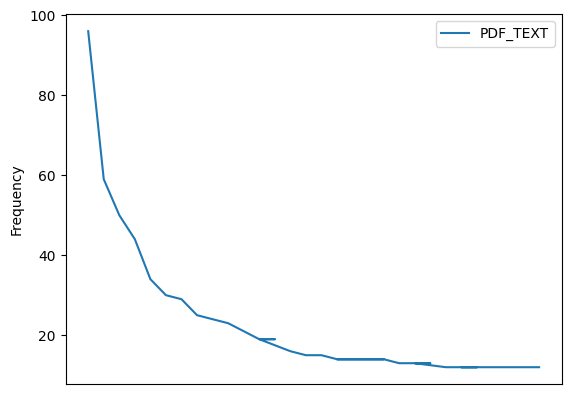

In [101]:
plt.plot(topwf_pdf_text["word"], topwf_pdf_text["freq"])
plt.legend(["PDF_TEXT"])
plt.xticks([])
plt.ylabel("Frequency")
plt.show()

In [102]:
topwf_pdf_text = topwf_pdf_text.reset_index(drop=True)

In [103]:
def smoothify(yInput, topwordlist):
    x = np.array(range(0,len(topwordlist.index)))
    y = np.array(yInput)
    x_smooth = np.linspace(x.min(), x.max(), 600)
    spl = make_interp_spline(x, y, k=3)
    y_smooth = spl(x_smooth)
    return x_smooth, y_smooth

In [104]:
ziffianCurveValues = [100/i for i in range(1, len(topwf_pdf_text.index)+1)]

In [105]:
x, y = smoothify(ziffianCurveValues, topwf_pdf_text)

In [106]:
freq_per = topwf_pdf_text["freq"]/topwf_pdf_text["freq"][0]*100

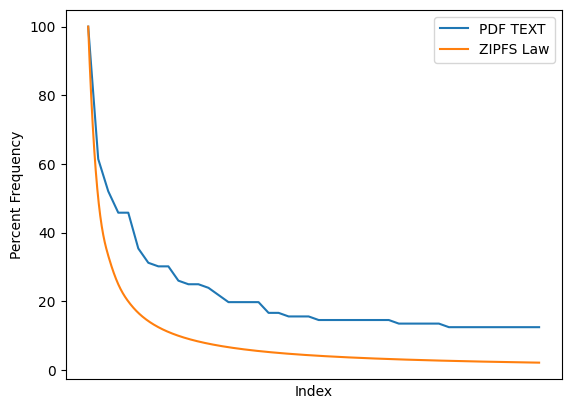

In [107]:
plt.plot(topwf_pdf_text.index, freq_per)
plt.plot(x,y)
plt.legend(["PDF TEXT", "ZIPFS Law"])
plt.xticks([])
plt.ylabel("Percent Frequency")
plt.xlabel("Index")
plt.show()

## Word Search

In [108]:
pdf_text_sentence

['        1   about this sample literature review: the following literature review was  composed as part of an honors capstone project proposal in the field of  communication sciences and disorders',
 'it served as the introduction to the project  proposal and  thus  was part of a larger work (as opposed to a stand-alone piece)',
 'the assignment was: in this literature review  you will create a justification for  your honors capstone project (and its design) by examining the state of  knowledge on your topic  the key concepts and theories that will serve as the  foundation for your project  and the gaps or needs that your project will address',
 'the literature review should be 4 to 5 double-spaced pages—slightly longer than  the literature review in a typical journal article',
 'this sample literature review is more comprehensive (meaning it draws on more  sources) than many class assignments but less comprehensive than literature  reviews for a thesis or dissertation',
 'class assig

In [109]:
def hasKeyword(sentence, keyword):

  context = []

  for sent in sentence:
    if keyword in sent:
      context.append(sent)

  return context

In [110]:
language = hasKeyword(pdf_text_sentence, "language")

In [111]:
language

['examining verb usage in english learners   english learners  those learning english in addition to other languages    composed 10% of the american school-age population in the 2014 – 2015 school   year (us department of education  2016)',
 'scores on the national assessment of educational progress   (naep) demonstrate that many of these children will need support in acquiring   english language skills',
 'many english learners struggle to   acquire english language skills  but it is important to note that there may be   different causes for this difficulty',
 'it would be help-  ful to have a topic   sentence / transition  that connects the  concepts of  language differences  and disorders to the  previous topic of  english learners',
 'a  stronger way to  begin this paragraph  would be to use the  term “slp” as a  hook: slps face a  number of barriers  and limitations to  accurately assessing  the language skills                         2   some children simply have a language diffe

## Word Trees

In [112]:
!pip install wordtree

In [113]:
import wordtree

  0%|          | 0/195 [00:00<?, ?it/s]

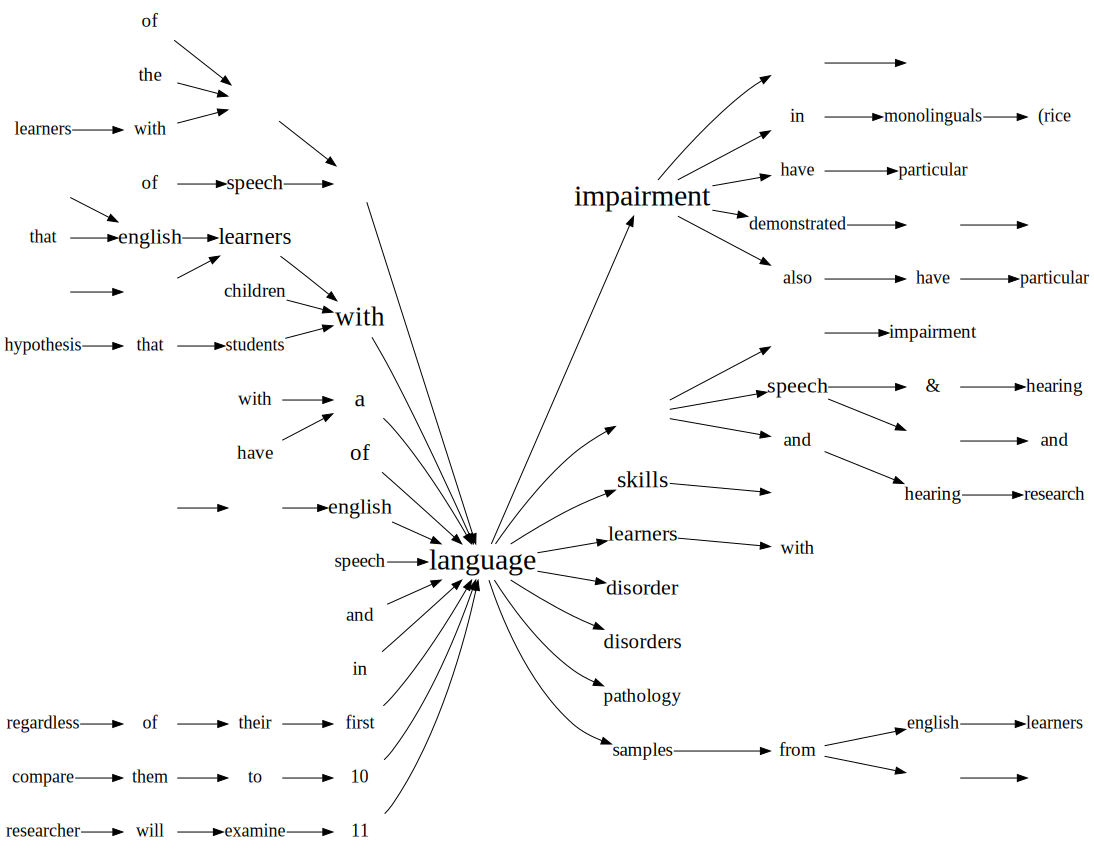

In [115]:
g = wordtree.search_and_draw(corpus = pdf_text_sentence, keyword = "language")
g